In [1]:
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.lhs import LatinHypercubeSampling
from pymoo.optimize import minimize as moo_minimize
from pymoo.factory import get_problem
from pymoode.nsde import NSDE
from pymoode.gde3 import GDE3
from pymoode.survivors import RankSurvival

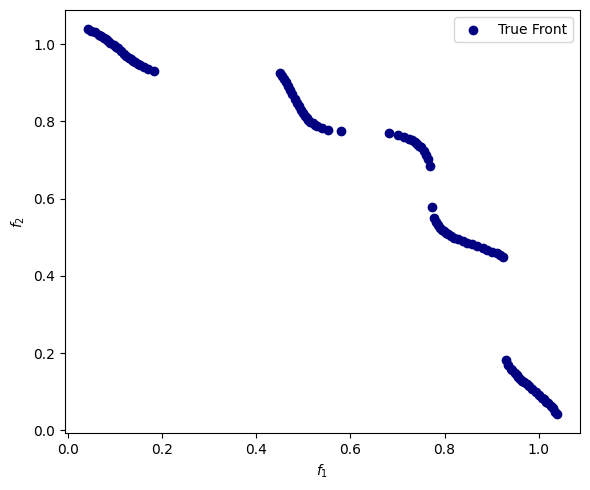

In [2]:
from pymoo.factory import get_problem

problem = get_problem("tnk")
pf = problem.pareto_front()

fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [3]:
problem.__dict__

{'n_var': 2,
 'n_obj': 2,
 'n_constr': 2,
 'data': {'type_var': numpy.float64},
 'xl': array([0.e+00, 1.e-30]),
 'xu': array([3.14159265, 3.14159265]),
 'callback': None,
 'check_inconsistencies': True,
 'replace_nan_values_by': inf,
 'exclude_from_serialization': [],
 '_pareto_set': <pymoo.util.cache.Cache at 0x191b4e86490>,
 '_pareto_front': <pymoo.util.cache.Cache at 0x191b4e863d0>,
 '_ideal_point': None,
 '_nadir_point': None}

In [4]:
lhs = LatinHypercubeSampling()

In [5]:
NGEN = 100
POPSIZE = 50
SEED = 5

In [15]:
gde3 = GDE3(pop_size=POPSIZE, CR=0.8, F=(0.0, 1.0), variant="DE/ranked/1/bin", SA=0.5, sampling=lhs, repair="bounce-back",
            survival=RankSurvival(rule="full", crowding_func="cd"))

res_gde3 = moo_minimize(problem,
                        gde3,
                        ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |      50 |  0.00000E+00 |  6.953353946 |  0.542703323 |  0.232312740 |  0.013916982
    2 |     100 |  0.00000E+00 |  2.892316229 |  0.256145965 |  0.190674098 |  0.043970069
    3 |     150 |  0.00000E+00 |  1.086003043 |  0.215615890 |  0.168116085 |  0.100812609
    4 |     200 |  0.00000E+00 |  0.228939929 |  0.182759974 |  0.139352536 |  0.136367616
    5 |     250 |  0.00000E+00 |  0.039646331 |  0.108088488 |  0.086708723 |  0.163111258
    6 |     300 |  0.00000E+00 |  0.00000E+00 |  0.088930912 |  0.066542188 |  0.210515505
    7 |     350 |  0.00000E+00 |  0.00000E+00 |  0.080470098 |  0.063283520 |  0.224643804
    8 |     400 |  0.00000E+00 |  0.00000E+00 |  0.052557326 |  0.030658170 |  0.242124198
    9 |     450 |  0.00000E+00 |  0.00000E+00 |  0.049546177 |  0.028822141 |  0.246480720
   10 |     500 |  0.00000E+00 |  0.00000E+00 |  0.040837485 |  0.023639010 |  0.259624443

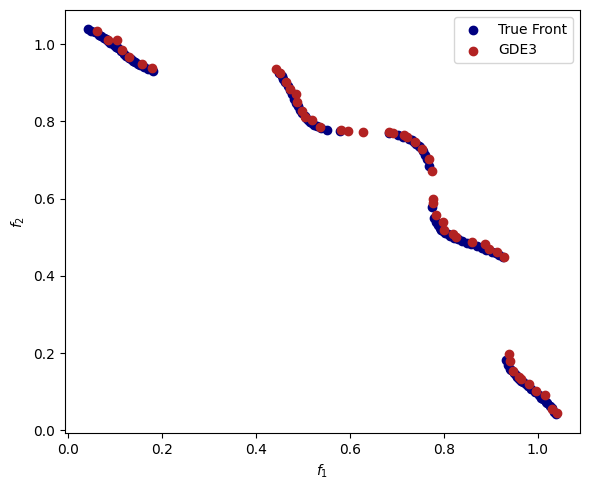

In [16]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_gde3.F[:, 0], res_gde3.F[:, 1], color="firebrick", label="GDE3")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [17]:
%%time
nsga2 = NSGA2(pop_size=POPSIZE, sampling=lhs, survival=RankSurvival(rule="full", crowding_func="cd"))

res_nsga2 = moo_minimize(problem,
                         nsga2,
                         ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |      50 |  0.00000E+00 |  6.953353946 |  0.542703323 |  0.232312740 |  0.013916982
    2 |     100 |  0.00000E+00 |  1.066024142 |  0.325334084 |  0.187192948 |  0.050867530
    3 |     150 |  0.00000E+00 |  0.084604765 |  0.211503872 |  0.048149751 |  0.175101922
    4 |     200 |  0.00000E+00 |  0.00000E+00 |  0.209304626 |  0.066601777 |  0.176068820
    5 |     250 |  0.00000E+00 |  0.00000E+00 |  0.179139201 |  0.075520185 |  0.184178182
    6 |     300 |  0.00000E+00 |  0.00000E+00 |  0.170019142 |  0.059944380 |  0.185053819
    7 |     350 |  0.00000E+00 |  0.00000E+00 |  0.160471442 |  0.050880534 |  0.194824704
    8 |     400 |  0.00000E+00 |  0.00000E+00 |  0.105130420 |  0.047723667 |  0.196476684
    9 |     450 |  0.00000E+00 |  0.00000E+00 |  0.094918495 |  0.046218201 |  0.223801046
   10 |     500 |  0.00000E+00 |  0.00000E+00 |  0.086218972 |  0.038658566 |  0.232179869

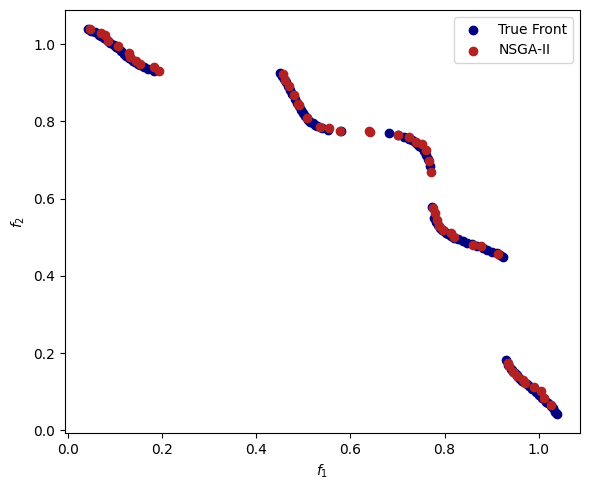

In [18]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_nsga2.F[:, 0], res_nsga2.F[:, 1], color="firebrick", label="NSGA-II")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [21]:
%%time
nsde = NSDE(pop_size=POPSIZE, CR=0.8, F=(0.0, 1.0), variant="DE/ranked/1/bin", SA=0.5, sampling=lhs, repair="bounce-back",
            survival=RankSurvival(rule="full", crowding_func="cd"))
    
res_nsde = moo_minimize(problem,
                        nsde,
                        ('n_gen', NGEN),
                        seed=SEED,
                        save_history=True,
                        verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |      50 |  0.00000E+00 |  6.953353946 |  0.542703323 |  0.232312740 |  0.013916982
    2 |     100 |  0.00000E+00 |  1.020639771 |  0.256145965 |  0.190674098 |  0.043970069
    3 |     150 |  0.00000E+00 |  0.210486440 |  0.201522752 |  0.126667770 |  0.081530281
    4 |     200 |  0.00000E+00 |  0.050156655 |  0.188300084 |  0.131876590 |  0.114969748
    5 |     250 |  0.00000E+00 |  0.001261067 |  0.082958052 |  0.043766021 |  0.219814884
    6 |     300 |  0.00000E+00 |  0.00000E+00 |  0.062333963 |  0.038334787 |  0.244174871
    7 |     350 |  0.00000E+00 |  0.00000E+00 |  0.057008376 |  0.032398501 |  0.253272989
    8 |     400 |  0.00000E+00 |  0.00000E+00 |  0.051757406 |  0.032300360 |  0.257521290
    9 |     450 |  0.00000E+00 |  0.00000E+00 |  0.044886988 |  0.029449880 |  0.261237964
   10 |     500 |  0.00000E+00 |  0.00000E+00 |  0.039179380 |  0.028620265 |  0.266385445

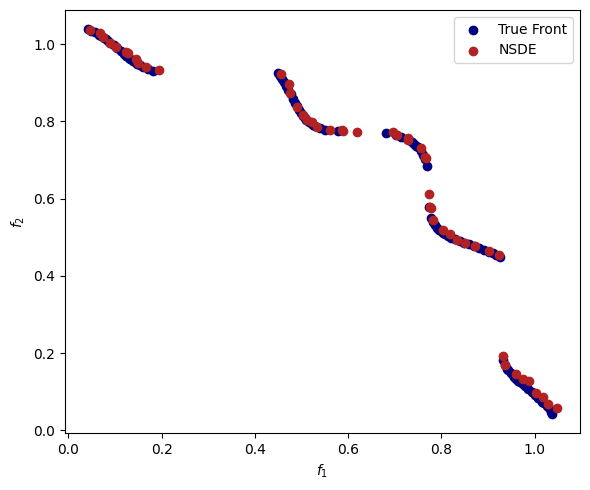

In [22]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_nsde.F[:, 0], res_nsde.F[:, 1], color="firebrick", label="NSDE")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()